# Decision Tree Regression

## 1-output

In [104]:
import numpy as np
rng = np.random.RandomState(42)
X = np.sort( 5*rng.randn(80,1), axis=0)
y = np.sin(X).ravel()

num_noises = 5 
noise_indices = rng.choice(len(y), size=num_noises, replace=False)
y[noise_indices] += 0.5-rng.randn(num_noises)

array([[ 0.87358942],
       [ 0.00914435],
       [-0.3655393 ],
       [ 0.64908673],
       [-1.22287354],
       [ 0.53633603],
       [-0.91469093],
       [ 0.62054822],
       [-0.16093738],
       [-0.3882644 ],
       [-0.88551237],
       [-0.35674503],
       [ 0.5561218 ],
       [ 1.04386061],
       [ 0.52644816],
       [ 1.36388652],
       [ 2.53916272],
       [-0.32449096],
       [-0.20586672],
       [-1.44004145],
       [ 1.19072726],
       [ 1.29939681],
       [-0.86714616],
       [ 0.61764085],
       [ 1.2170708 ],
       [ 0.22628827],
       [ 0.84740143],
       [ 0.17483301],
       [-1.21685489],
       [ 1.04934739],
       [ 1.32510566],
       [ 0.73450106],
       [-0.95449726],
       [-0.75117942],
       [-1.13042805],
       [ 0.76997736],
       [ 1.26838952],
       [ 0.42448624],
       [ 0.94053558],
       [-0.86764109],
       [ 0.14586185],
       [-1.36987106],
       [-0.77178075],
       [ 0.87867355],
       [-0.23959451],
       [ 1

In [90]:
y.shape

(80,)

In [91]:
from sklearn.tree import DecisionTreeRegressor

regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [113]:
X_test = np.arange(-10,10,0.1)[:, np.newaxis]
y1 = regr1.predict(X_test)
y2 = regr2.predict(X_test)

In [114]:
X.shape

(80, 1)

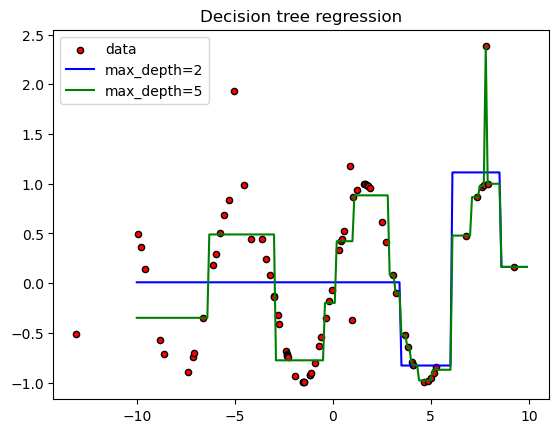

In [119]:
import matplotlib.pyplot as plt
plt.scatter(X,y, s=20, c='red', edgecolor='black',label ='data')
plt.plot(X_test, y1, c='blue',label='max_depth=2')
plt.plot(X_test, y2, c='green',label='max_depth=5')
plt.title('Decision tree regression')
plt.legend()

📈
- depth ↑， overfit.  We should use CV.

## Multi-Output targets

In [120]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

In [121]:
X.shape

(100, 1)

In [122]:
y.shape

(100, 2)

In [123]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [124]:
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

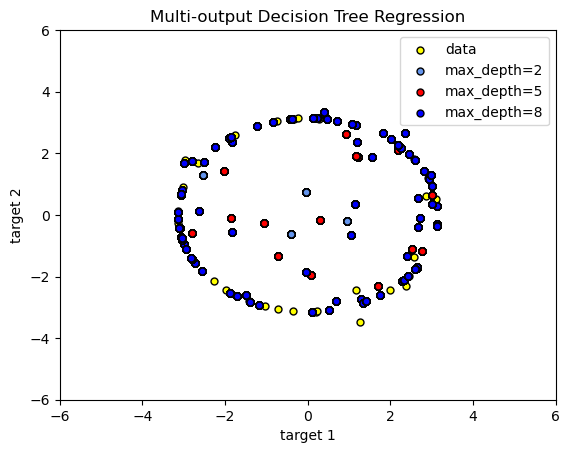

In [125]:
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="yellow", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="blue", s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()